<a href="https://colab.research.google.com/github/Jamshidbek077/AviaCHipta_narxlari_prediction_models/blob/master/Aviachipta_narxlari1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder,LabelEncoder,StandardScaler
LE=LabelEncoder()

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegressionCV
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [ ]:
df_train=pd.read_csv('/content/train_data.csv')
df_train.head(20)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
5,6,Air_India,AI-636,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
6,7,Vistara,UK-834,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054
7,8,Air_India,AI-505,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
8,9,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,15.92,12,11383
9,10,Air_India,AI-538,Chennai,Night,one,Afternoon,Mumbai,Economy,16.50,18,4357


In [ ]:
df_train=df_train.dropna()

In [ ]:
df_test=pd.read_csv('/content/test_data.csv')
df_test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [ ]:
df_train['departure_time'].unique()

array(['Early_Morning', 'Evening', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [ ]:
# df_train.columns[2].info()

In [ ]:
df_train['class']=LE.fit_transform(df_train['class'])
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,1,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,1,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,0,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,1,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,1,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,1,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,1,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,1,16.33,21,6450


In [ ]:
def processing(df):
  # df.drop('flight',axis=1,inplace=True)
  df['departure_time']=LE.fit_transform(df['departure_time'])
  df['stops']=LE.fit_transform(df['stops'])
  # df['arrival_time']=LE.fit_transfrom(df['arrival_time'])
  df['class']=LE.fit_transform(df['class'])
  return df
df_train=processing(df_train)
df_test=processing(df_test)
X=df_train.drop('price',axis=1)
y=df_train['price']

In [ ]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,1,0,Night,Mumbai,1,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,2,2,Night,Kolkata,1,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,4,0,Evening,Delhi,0,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,4,0,Evening,Hyderabad,1,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,1,2,Morning,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,5,0,Early_Morning,Mumbai,1,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,4,0,Afternoon,Delhi,1,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,1,1,Evening,Bangalore,1,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,2,0,Morning,Bangalore,1,16.33,21,6450


In [ ]:
cols=df_train.columns
cols


Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
df_train['airline'].unique()

array(['Vistara', 'SpiceJet', 'Indigo', 'Air_India', 'GO_FIRST',
       'AirAsia'], dtype=object)

In [ ]:
for i_col in cols:
  print(i_col,len(df_train[i_col].unique()))

id 20000
airline 6
flight 1310
source_city 6
departure_time 6
stops 3
arrival_time 6
destination_city 6
class 2
duration 404
days_left 49
price 4420


In [ ]:
coll=df_train[['flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city']]

In [ ]:
for i in coll:
  unique=df_train[i].unique()
  index=range(len(unique))

  df_train[i]=df_train[i].replace(unique,index)



In [ ]:
index

range(0, 6)

In [ ]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,0,0,0,0,0,0,1,14.25,21,7212
1,2,SpiceJet,1,1,1,1,0,1,1,1.75,7,5292
2,3,Vistara,2,0,2,0,1,2,0,9.58,5,60553
3,4,Vistara,3,2,2,0,1,3,1,6.75,28,5760
4,5,Indigo,4,3,0,1,2,0,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,605,0,4,0,4,0,1,7.92,45,3153
19996,19997,AirAsia,674,2,2,0,3,2,1,5.83,24,3911
19997,19998,Vistara,70,3,0,2,1,5,1,35.33,17,14822
19998,19999,Vistara,166,5,1,0,2,5,1,16.33,21,6450


In [ ]:
air_unique=df_train['airline'].unique()
# len(air_unique)
index=range(len(air_unique))
index

range(0, 6)

In [ ]:
df_train['airline']=df_train['airline'].replace(air_unique,index)
df_train['flight']=df_train['flight'].replace()

In [ ]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,0,0,0,0,0,0,0,1,14.25,21,7212
1,2,1,1,1,1,1,0,1,1,1.75,7,5292
2,3,0,2,0,2,0,1,2,0,9.58,5,60553
3,4,0,3,2,2,0,1,3,1,6.75,28,5760
4,5,2,4,3,0,1,2,0,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2,605,0,4,0,4,0,1,7.92,45,3153
19996,19997,5,674,2,2,0,3,2,1,5.83,24,3911
19997,19998,0,70,3,0,2,1,5,1,35.33,17,14822
19998,19999,0,166,5,1,0,2,5,1,16.33,21,6450


In [ ]:
df_train.dropna()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,0,0,0,0,0,0,0,1,14.25,21,7212
1,2,1,1,1,1,1,0,1,1,1.75,7,5292
2,3,0,2,0,2,0,1,2,0,9.58,5,60553
3,4,0,3,2,2,0,1,3,1,6.75,28,5760
4,5,2,4,3,0,1,2,0,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2,605,0,4,0,4,0,1,7.92,45,3153
19996,19997,5,674,2,2,0,3,2,1,5.83,24,3911
19997,19998,0,70,3,0,2,1,5,1,35.33,17,14822
19998,19999,0,166,5,1,0,2,5,1,16.33,21,6450


In [ ]:
# def infofull_train(df_train):
#   for col_name in df_train.columns:
#     print(col_name, df_train[col_name].unique().sum(), df_train[df_train[col_name].isna()].shape[0])
# infofull_train(df_train)


In [ ]:
print(f"{df_test.info()},{df_train.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   flight            5000 non-null   object 
 3   source_city       5000 non-null   object 
 4   departure_time    5000 non-null   int64  
 5   stops             5000 non-null   int64  
 6   arrival_time      5000 non-null   object 
 7   destination_city  5000 non-null   object 
 8   class             5000 non-null   int64  
 9   duration          5000 non-null   float64
 10  days_left         5000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 429.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id        

In [ ]:
print(f"{df_test.describe()},{df_train.describe()}")

                id  departure_time        stops        class     duration  \
count  5000.000000     5000.000000  5000.000000  5000.000000  5000.000000   
mean   2500.500000        2.374600     0.272800     0.694600    12.328838   
std    1443.520003        1.744272     0.657318     0.460623     7.306348   
min       1.000000        0.000000     0.000000     0.000000     0.830000   
25%    1250.750000        1.000000     0.000000     0.000000     6.830000   
50%    2500.500000        2.000000     0.000000     1.000000    11.250000   
75%    3750.250000        4.000000     0.000000     1.000000    16.250000   
max    5000.000000        5.000000     2.000000     1.000000    40.670000   

         days_left  
count  5000.000000  
mean     26.015600  
std      13.692409  
min       1.000000  
25%      14.000000  
50%      26.000000  
75%      38.000000  
max      49.000000  ,                 id       airline        flight  source_city  departure_time  \
count  20000.000000  20000.000000  20

In [ ]:
print(f"{df_test.isnull().sum()},{df_train.isnull().sum()}")

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64,id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [ ]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,0,0,0,0,0,0,0,1,14.25,21,7212
1,2,1,1,1,1,1,0,1,1,1.75,7,5292
2,3,0,2,0,2,0,1,2,0,9.58,5,60553
3,4,0,3,2,2,0,1,3,1,6.75,28,5760
4,5,2,4,3,0,1,2,0,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2,605,0,4,0,4,0,1,7.92,45,3153
19996,19997,5,674,2,2,0,3,2,1,5.83,24,3911
19997,19998,0,70,3,0,2,1,5,1,35.33,17,14822
19998,19999,0,166,5,1,0,2,5,1,16.33,21,6450


In [ ]:
df_train=df_train.dropna()

In [ ]:
df_train

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,0,0,0,0,0,0,0,1,14.25,21,7212
1,2,1,1,1,1,1,0,1,1,1.75,7,5292
2,3,0,2,0,2,0,1,2,0,9.58,5,60553
3,4,0,3,2,2,0,1,3,1,6.75,28,5760
4,5,2,4,3,0,1,2,0,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2,605,0,4,0,4,0,1,7.92,45,3153
19996,19997,5,674,2,2,0,3,2,1,5.83,24,3911
19997,19998,0,70,3,0,2,1,5,1,35.33,17,14822
19998,19999,0,166,5,1,0,2,5,1,16.33,21,6450


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df_train.corr()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,1.000000,-0.004238,0.075772,0.011578,-0.000167,-0.003441,-0.004369,0.006448,-0.000039,-0.000458,0.003195,-0.002443
airline,-0.004238,1.000000,0.343071,0.023824,-0.018722,0.054405,0.166525,-0.045471,0.260805,-0.087926,0.037094,-0.319172
flight,0.075772,0.343071,1.000000,0.107796,-0.038198,0.118985,0.119702,-0.036593,0.303361,-0.254214,0.042400,-0.325010
source_city,0.011578,0.023824,0.107796,1.000000,-0.006257,0.030033,-0.010232,0.195606,-0.016816,-0.023960,-0.009443,0.006176
departure_time,-0.000167,-0.018722,-0.038198,-0.006257,1.000000,-0.036143,0.029193,0.022003,-0.026463,0.033207,0.002905,0.015704
stops,-0.003441,0.054405,0.118985,0.030033,-0.036143,1.000000,0.010923,0.034049,0.128894,-0.264165,-0.028936,-0.170436
arrival_time,-0.004369,0.166525,0.119702,-0.010232,0.029193,0.010923,1.000000,-0.013646,0.076536,-0.018469,0.034274,-0.105894
destination_city,0.006448,-0.045471,-0.036593,0.195606,0.022003,0.034049,-0.013646,1.000000,-0.004804,0.024253,0.012343,0.002565
class,-0.000039,0.260805,0.303361,-0.016816,-0.026463,0.128894,0.076536,-0.004804,1.000000,-0.144831,0.022332,-0.937868
duration,-0.000458,-0.087926,-0.254214,-0.023960,0.033207,-0.264165,-0.018469,0.024253,-0.144831,1.000000,-0.020091,0.213158


In [ ]:
num_attribs = ['class','stops','duration','days_left']
cat_attribs = ['airline','source_city','departure_time','arrival_time','destination_city']

In [ ]:
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
X_train=full_pipeline.fit_transform(X_train)
X_test=full_pipeline.fit_transform(X_test)

df_test=full_pipeline.fit_transform(df_test)

# Data vizualization

In [ ]:
for i in coll:
  sns.scatterplot(data=df_train[['duration', 'days_left', 'price']], x=df_train[i],y='price' , hue='clas')
  plt.show()


ValueError: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


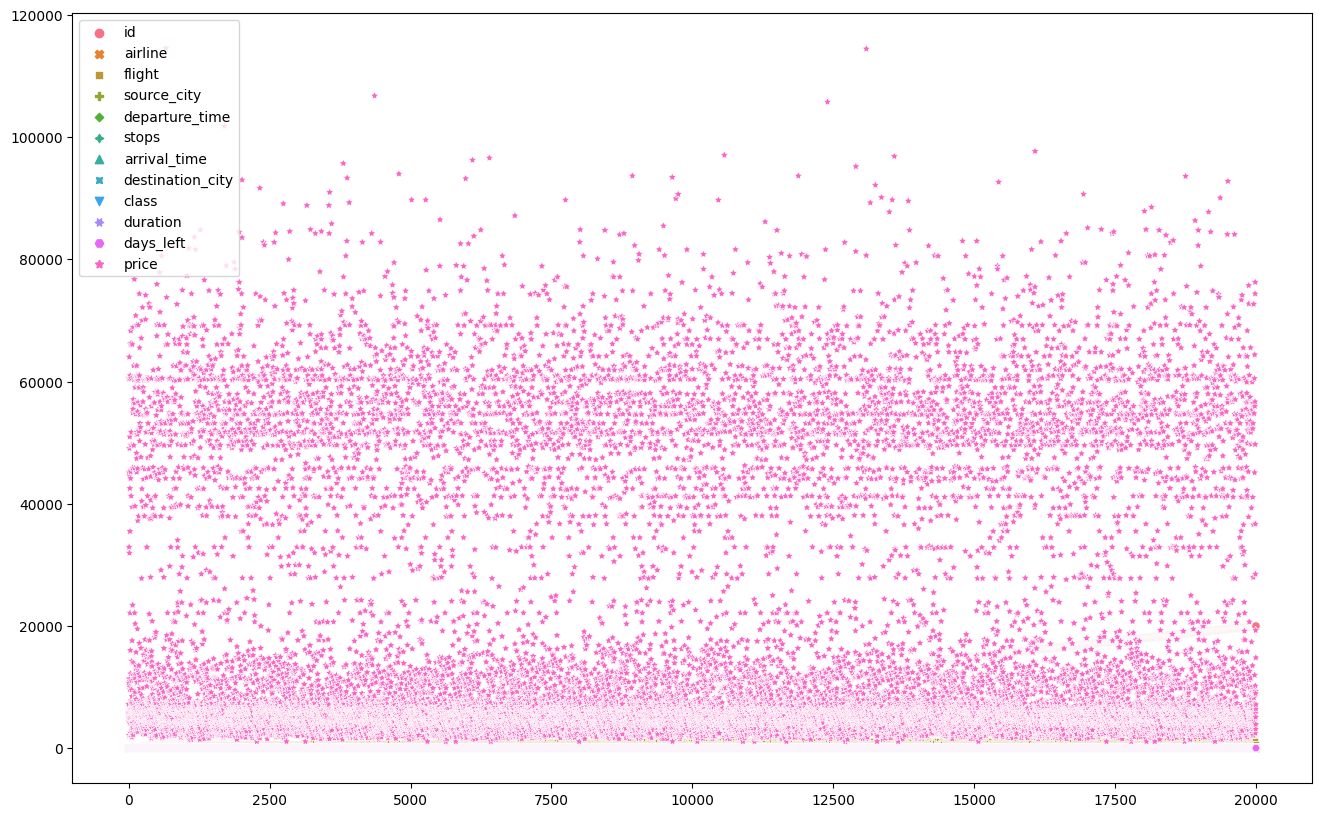

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_train)
plt.show()

# Model Building

In [ ]:
def model(y_test,y_train,X_test,X_train,model):

    model1 = model()
    model1.fit(X_train,y_train)
    y_pred = model1.predict(X_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [ ]:
x1 = [model(y_test,y_train,X_test,X_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor,LogisticRegression]]
x1

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 46614373.78902833
MAE: 4596.839114181073
R2 : 91.12 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 46610691.73877483
MAE: 4595.15064147456
R2 : 91.12 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 46613792.64501595
MAE: 4596.577333430059
R2 : 91.12 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 97436213.75570087
MAE: 7413.75929221752
R2 : 81.44 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 14760289.466674546
MAE: 1988.8479912380951
R2 : 97.19 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 24345885.5631875
MAE: 2264.290875
R2 : 95.36 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
MSE: 20952855

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
-----------------
MSE: 30236322.6775
MAE: 2525.392
R2 : 94.24 %


[None, None, None, None, None, None, None, None, None]

In [ ]:
X = full_pipeline.fit_transform(X)
model = RandomForestRegressor()
model.fit(X, y)
y_predicted = model.predict(df_test)
y_predicted


In [ ]:
sample=pd.read_csv('/content/sample_solution.csv')
sample.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
y_predicted

In [ ]:
sample['price']=y_predicted
sample